### Playstore Dataset EDA

1. Data cleaning
2. Exploratory Data Analysis (EDA)
3. Feature Engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

##### The data set a lot of missing values

###### Lets start with reviews

In [7]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [8]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


so delete this particular only record which is not numeric rating

In [9]:
df_copy=df.copy()
df_copy=df_copy.drop(df_copy.index[10472])


In [10]:
df_copy[~df_copy['Reviews'].str.isnumeric()] ## NO more non numeric rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [11]:
## Now we can convert this review into int
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


#### Now lets go through size

In [13]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [14]:
df['Size'].value_counts() ## 1695 "Varies with device"

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
552k                     1
885k                     1
1020k                    1
582k                     1
619k                     1
Name: count, Length: 462, dtype: int64

In [15]:
def convert(size):
    if isinstance(size, str):
        size = size.strip()
        if size.endswith('M'):
            return float(size.replace('M', '')) * 1000  # MB -> KB
        elif size.endswith('k'):
            return float(size.replace('k', ''))         # already in KB
        elif size == 'Varies with device':
            return np.nan
    return np.nan

df_copy['Size']=df_copy['Size'].apply(convert)

In [16]:
df_copy['Size'].isnull().sum()

np.int64(1695)

In [17]:
df_copy['Size']=df_copy['Size'].astype(float) ## Convert the complete column into float value including NaN values....

In [18]:
df_copy.head() ## We get size in 'K'

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Now lets continue with installs and price

In [19]:
df_copy['Installs'].unique() ##We have to remove all '+ and ,'

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [20]:
df_copy['Price'].unique() ## We have to remove all $ and ,

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [21]:
chars_to_rem=['$',',','+']
cols_to_chck=['Price','Installs']
for char in chars_to_rem:
    for cols in cols_to_chck:
        df_copy[cols]=df_copy[cols].str.replace(char,'')


In [22]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [24]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [25]:
df_copy['Installs']=df_copy['Installs'].astype(int)
df_copy['Price']=df_copy['Price'].astype(float)

In [26]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


Now lets go with lastupdated!!


In [27]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [28]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated']) ##It can convert it into general datetime format

In [29]:
df_copy['Last Updated'].unique()

<DatetimeArray>
['2018-01-07 00:00:00', '2018-01-15 00:00:00', '2018-08-01 00:00:00',
 '2018-06-08 00:00:00', '2018-06-20 00:00:00', '2017-03-26 00:00:00',
 '2018-04-26 00:00:00', '2018-06-14 00:00:00', '2017-09-20 00:00:00',
 '2018-07-03 00:00:00',
 ...
 '2015-11-23 00:00:00', '2012-06-17 00:00:00', '2015-02-27 00:00:00',
 '2013-12-18 00:00:00', '2012-02-06 00:00:00', '2014-11-25 00:00:00',
 '2016-05-19 00:00:00', '2014-01-20 00:00:00', '2014-02-16 00:00:00',
 '2014-03-23 00:00:00']
Length: 1377, dtype: datetime64[ns]

In [30]:
df_copy['Last_Up_Date']=df_copy['Last Updated'].dt.day
df_copy['Last_Up_Month']=df_copy['Last Updated'].dt.month
df_copy['Last_Up_Year']=df_copy['Last Updated'].dt.year

In [31]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Up_Date,Last_Up_Month,Last_Up_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [32]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Last_Up_Date    10840 non-null  int32         
 14  Last_Up_Month   10840 non-null  int32         
 15  Last_Up

In [33]:
# df_copy.drop('Last Updated',axis=1,inplace=True)

In [34]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Up_Date,Last_Up_Month,Last_Up_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [35]:
df_copy.to_csv('cleaned_googleplaystore.csv') ## save the cleaned on in csv format

### Now lets start EDA

In [36]:
## Lets check duplicates
df[df['App'].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [37]:
##Total 1181 records are duplicated so we can drop these duplicates
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first') ##It will keep the first record and remove all the duplicates after that

In [38]:
df_copy.shape

(9659, 16)

lets explore the data

In [39]:
numeric_features=[feature for feature in df_copy.columns if df_copy[feature].dtype!='O']
categorical_features=[feature for feature in df_copy.columns if df_copy[feature].dtype=='O']

print(f"Total {len(numeric_features)} numeric fetaures i.e {numeric_features}")
print(f"Total {len(categorical_features)} categoical fetaures i.e {categorical_features}")

Total 9 numeric fetaures i.e ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Last_Up_Date', 'Last_Up_Month', 'Last_Up_Year']
Total 7 categoical fetaures i.e ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


#### Features of the dataset
01. App: Name of the App

02. Category: Category of the app. This could be beauty, business, entertainment, education...etc.

03. Rating: How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

04. Reviews: The number of user reviews each app has received.

05. Size: The memory size needed to install the application.

06. Installs: The number of times each application has been installed by users.

07. Type: Whether the app is free or a paid app.

08. Price: The price of the app.

09. Content Rating: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

10. Genres: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.

11. Last Updated: Release date of the most recent update for the app.

12. Current Ver: The app's current version.

13. Android Ver: The oldest version of Android OS supported by the app

C:\Users\kvmit\AppData\Local\Temp\ipykernel_16648\1264870194.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[numeric_features[i]],shade=True,color='r')
C:\Users\kvmit\AppData\Local\Temp\ipykernel_16648\1264870194.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[numeric_features[i]],shade=True,color='r')
C:\Users\kvmit\AppData\Local\Temp\ipykernel_16648\1264870194.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[numeric_features[i]],shade=True,color='r')
C:\Users\kvmit\AppData\Local\Temp\ipykernel_16648\1264870194.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; 

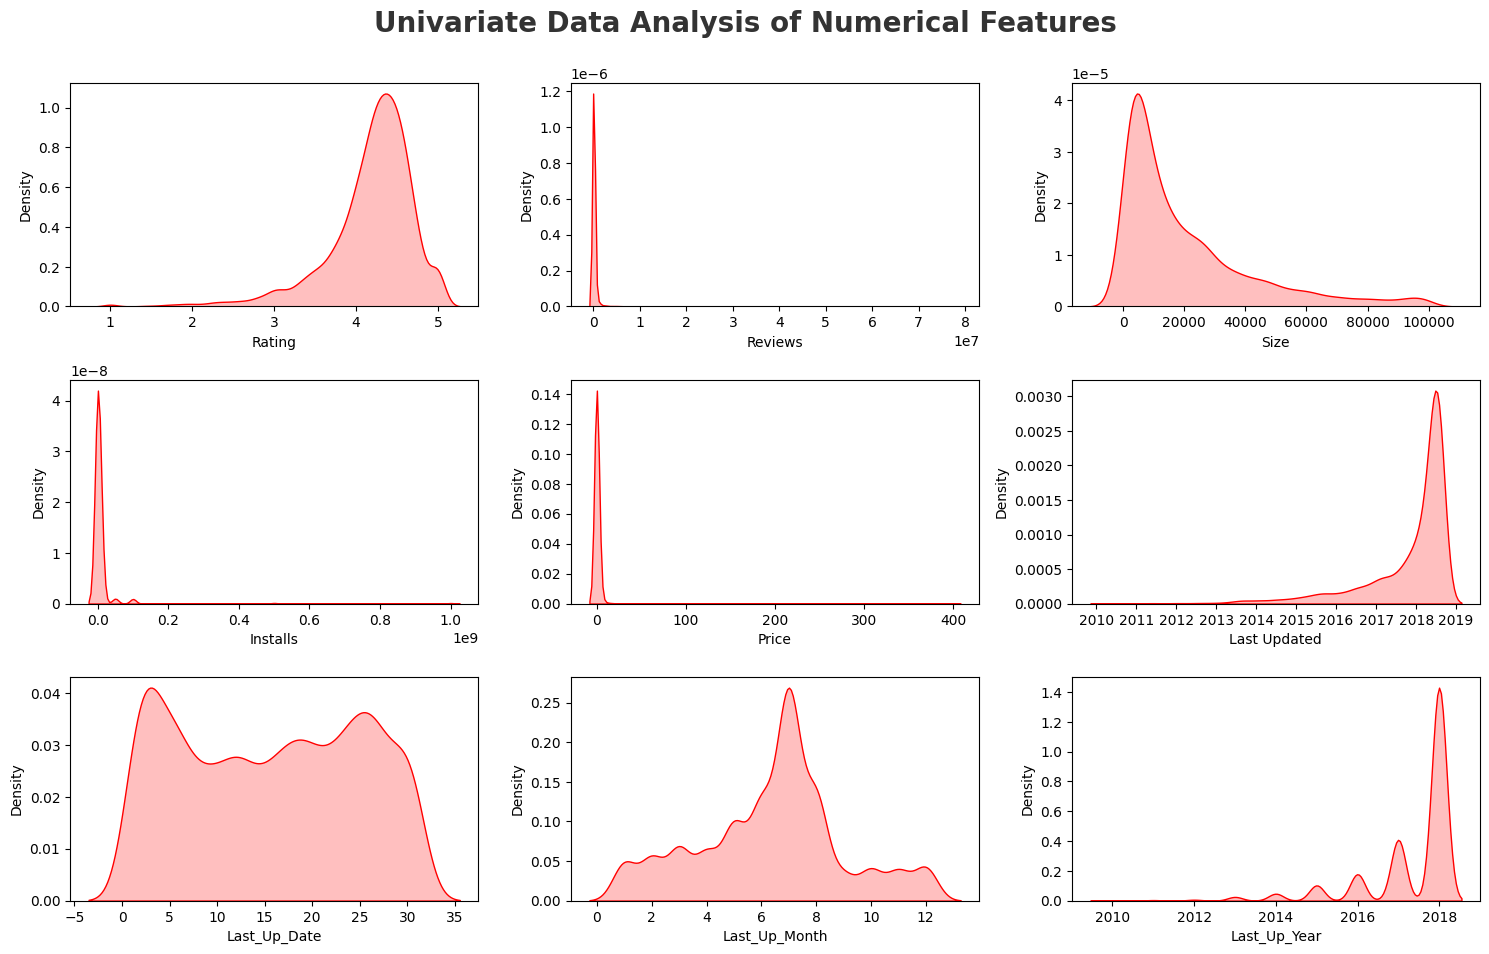

In [40]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Data Analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1)
for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],shade=True,color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Obervations
- Rating,Last_up_year are left skewed
- Reviews,size,installs,price are right skewed

C:\Users\kvmit\AppData\Local\Temp\ipykernel_16648\1455618515.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_copy[categories[i]],palette='Set2')
C:\Users\kvmit\AppData\Local\Temp\ipykernel_16648\1455618515.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_copy[categories[i]],palette='Set2')


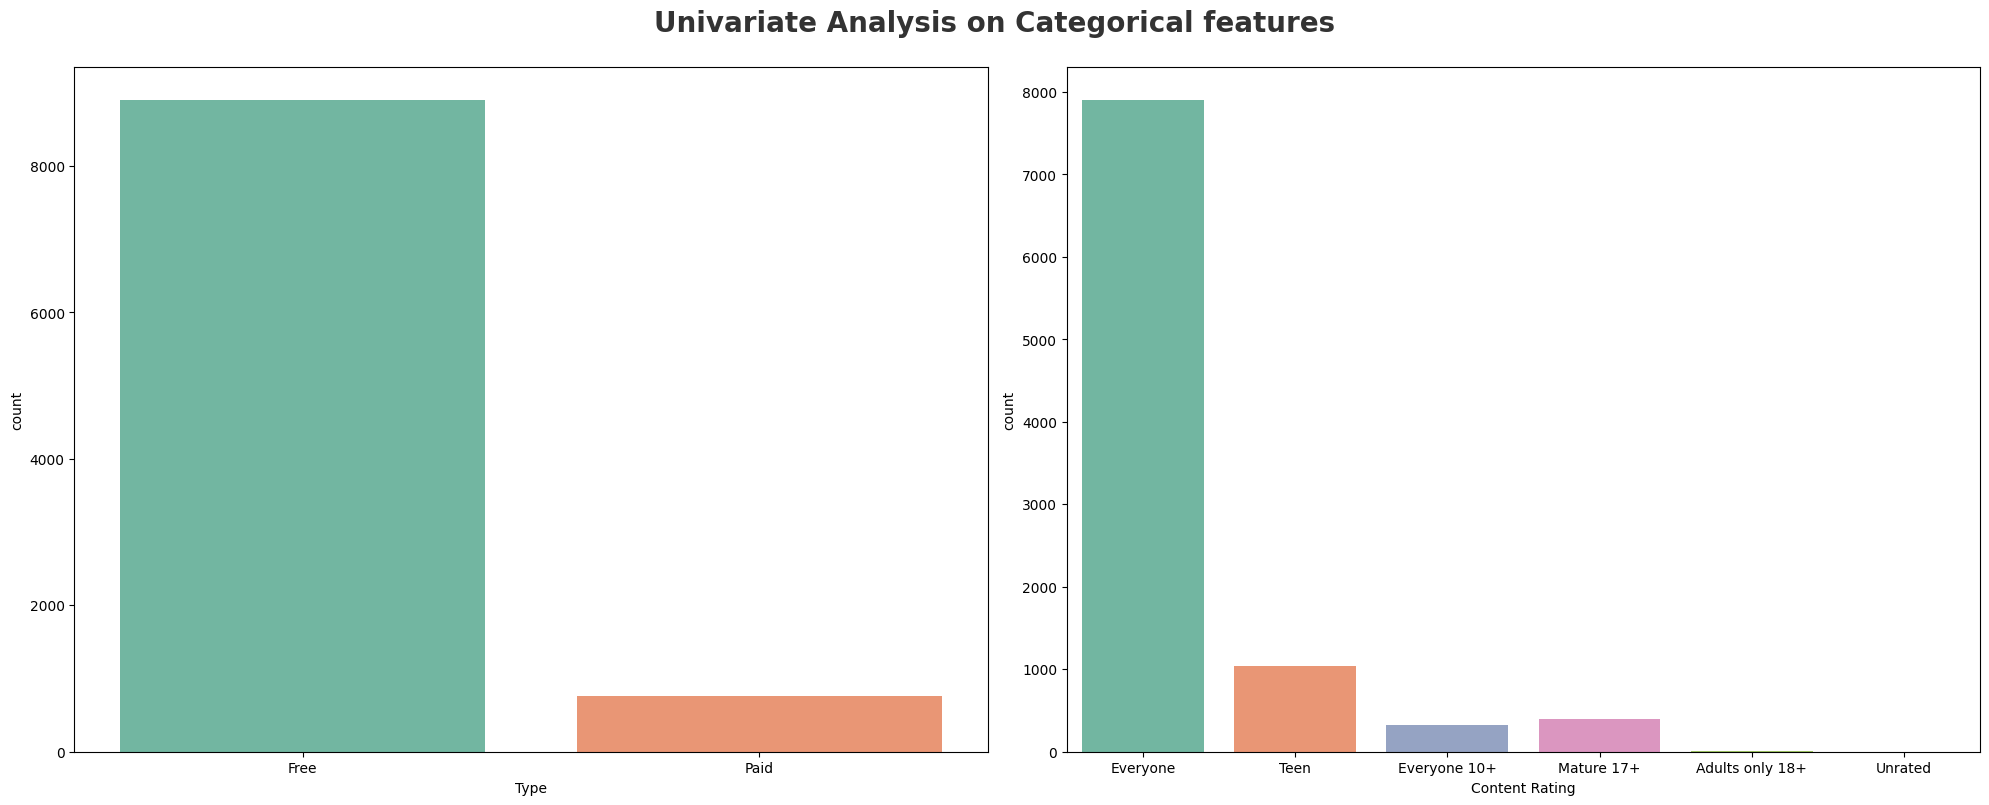

In [41]:
## Lets do univariate analysis on categorical features
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis on Categorical features',fontsize=20,fontweight='bold',alpha=0.8,y=1)
categories=['Type','Content Rating']
for i in range(0,len(categories)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df_copy[categories[i]],palette='Set2')
    plt.xlabel(categories[i])
    plt.tight_layout()

### Which is the most popular category?

<Axes: ylabel='count'>

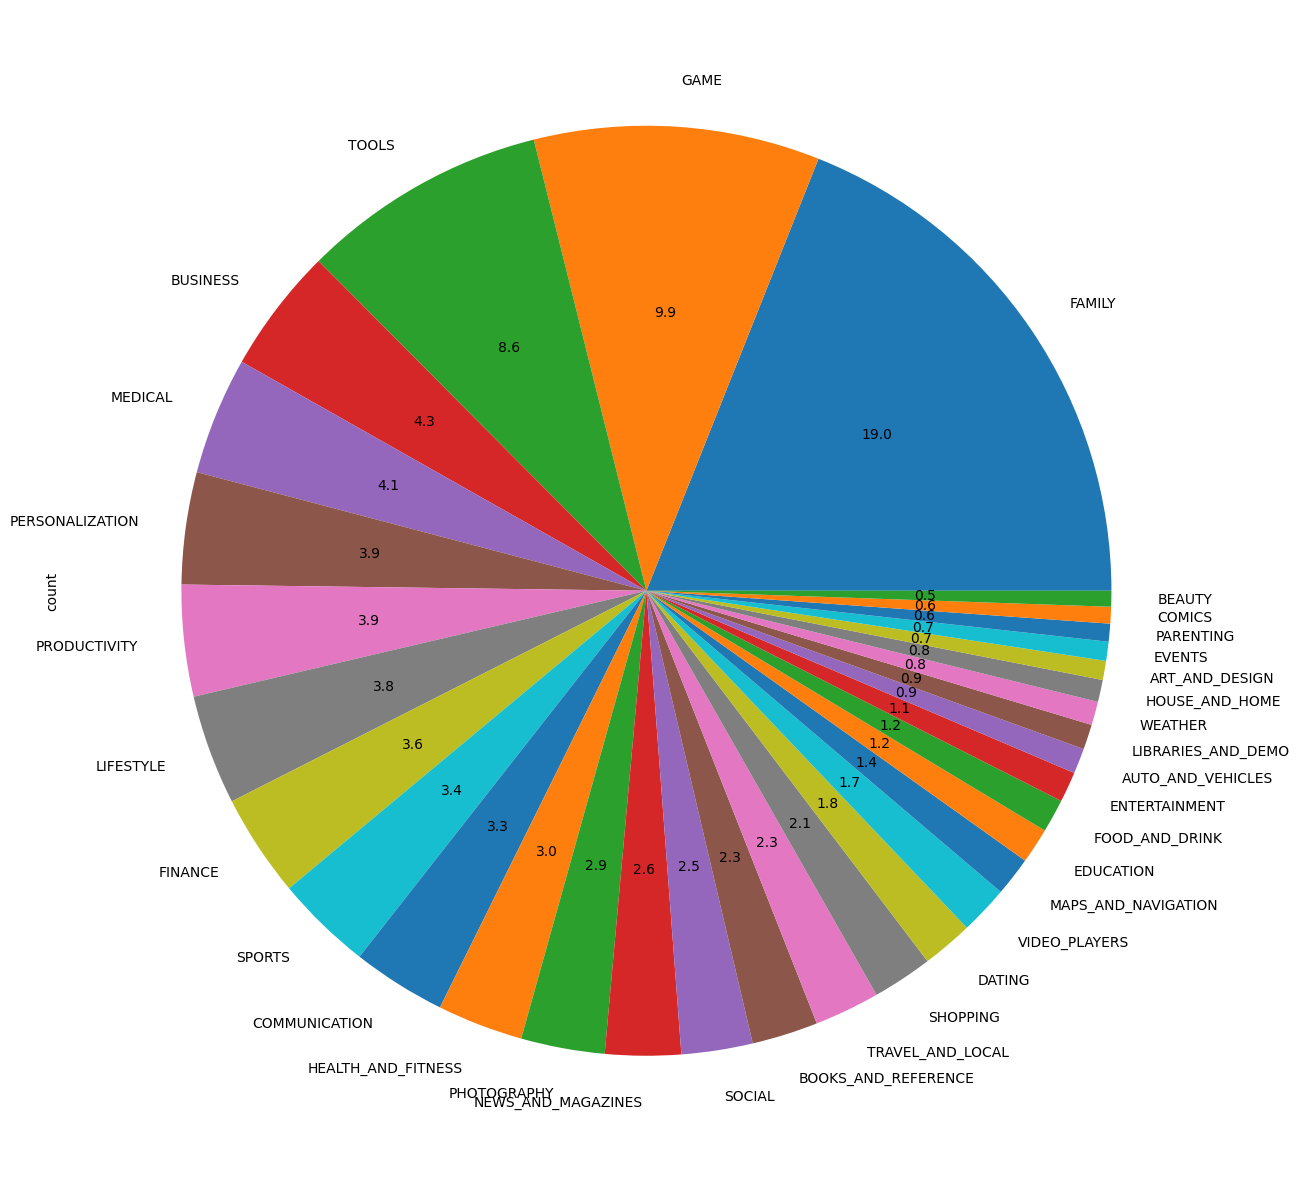

In [42]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,20),autopct='%1.1f')

### Obesrvations
- There are more family,Game,Tool category apps
- There are less beauty,comics etc kinds of app

In [43]:
### Top 10 app categories
top_categories=pd.DataFrame(df_copy['Category'].value_counts())
top_categories

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


C:\Users\kvmit\AppData\Local\Temp\ipykernel_16648\3831634072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index[:10],y='count',data=top_categories[:10],palette='hls')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'GAME'),
  Text(2, 0, 'TOOLS'),
  Text(3, 0, 'BUSINESS'),
  Text(4, 0, 'MEDICAL'),
  Text(5, 0, 'PERSONALIZATION'),
  Text(6, 0, 'PRODUCTIVITY'),
  Text(7, 0, 'LIFESTYLE'),
  Text(8, 0, 'FINANCE'),
  Text(9, 0, 'SPORTS')])

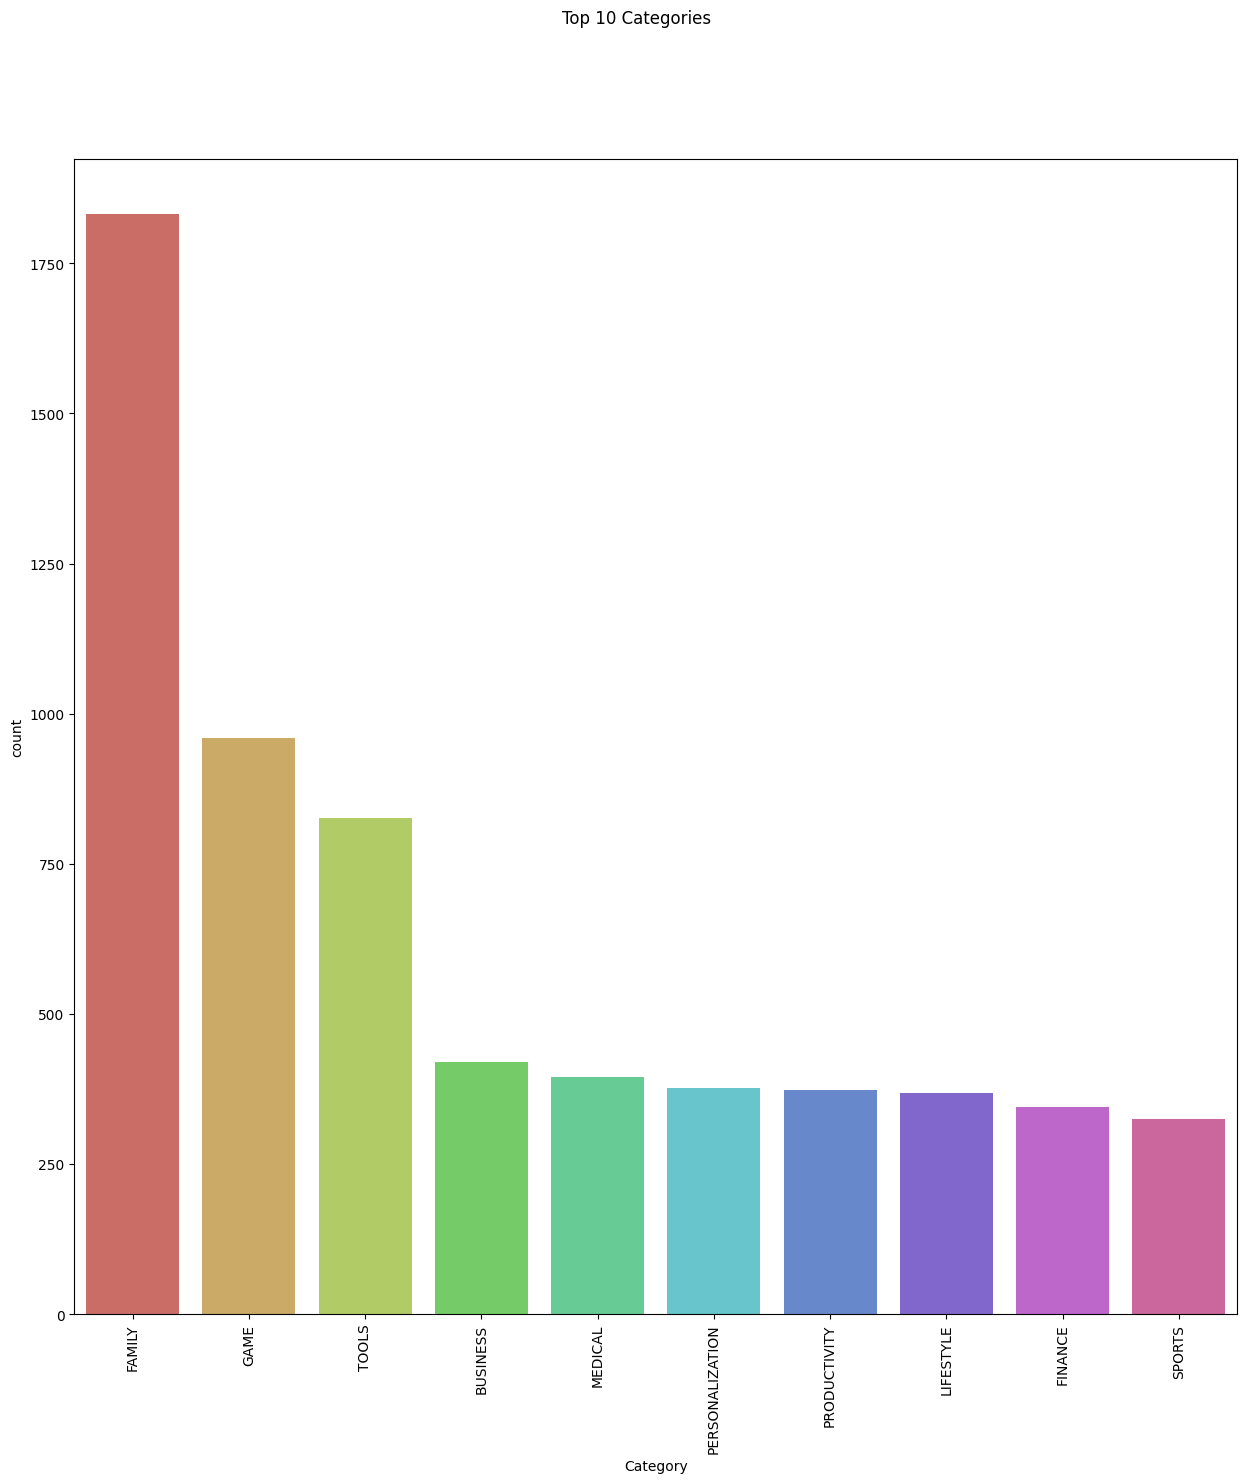

In [44]:
plt.figure(figsize=(15,15))
plt.suptitle('Top 10 Categories')
sns.barplot(x=top_categories.index[:10],y='count',data=top_categories[:10],palette='hls')
plt.xticks(rotation=90)


### Which category has the most installations

C:\Users\kvmit\AppData\Local\Temp\ipykernel_16648\2062416991.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_installs.index[:10],y='Installs',data=categorical_installs[:10],palette='hls')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'GAME'),
  Text(1, 0, 'COMMUNICATION'),
  Text(2, 0, 'TOOLS'),
  Text(3, 0, 'PRODUCTIVITY'),
  Text(4, 0, 'SOCIAL'),
  Text(5, 0, 'PHOTOGRAPHY'),
  Text(6, 0, 'FAMILY'),
  Text(7, 0, 'VIDEO_PLAYERS'),
  Text(8, 0, 'TRAVEL_AND_LOCAL'),
  Text(9, 0, 'NEWS_AND_MAGAZINES')])

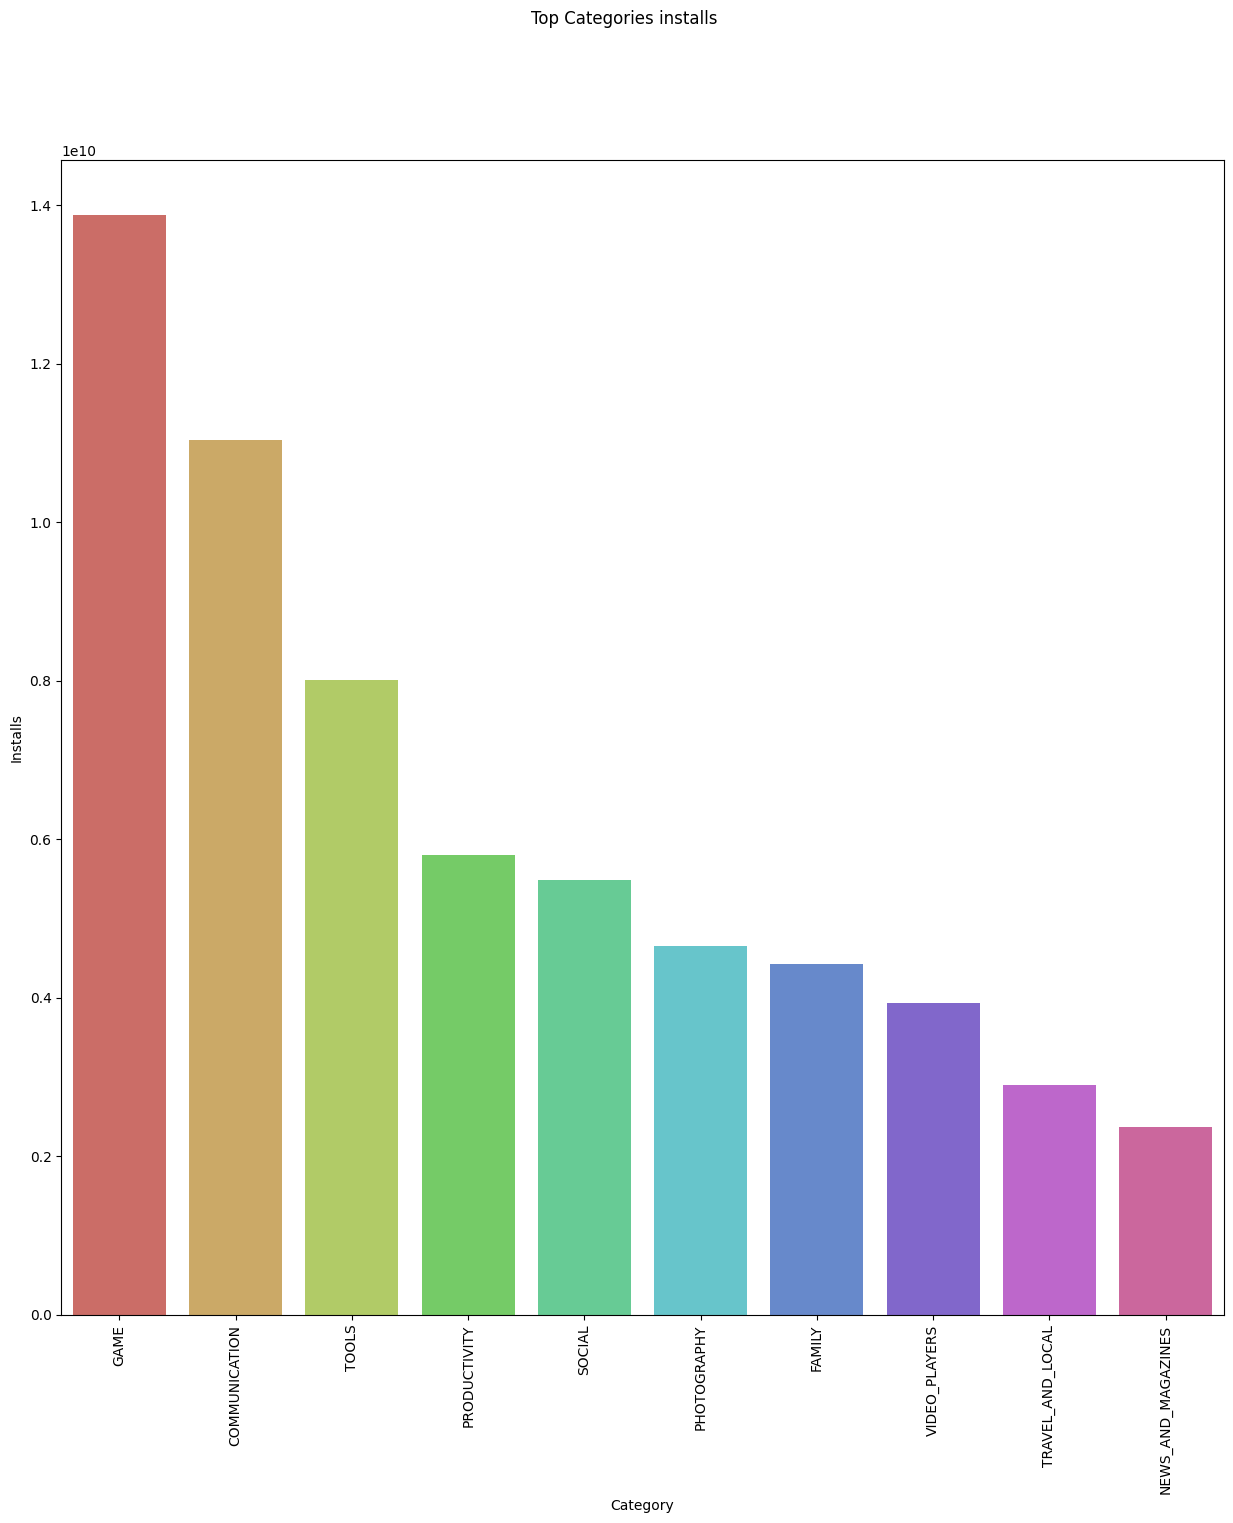

In [45]:
categorical_installs=pd.DataFrame(df_copy.groupby(df_copy['Category'])['Installs'].sum().sort_values(ascending=False))
plt.figure(figsize=(15,15))
plt.suptitle('Top Categories installs')
sns.barplot(x=categorical_installs.index[:10],y='Installs',data=categorical_installs[:10],palette='hls')
plt.xticks(rotation=90)



### Top 5 most installed apps in each catgory

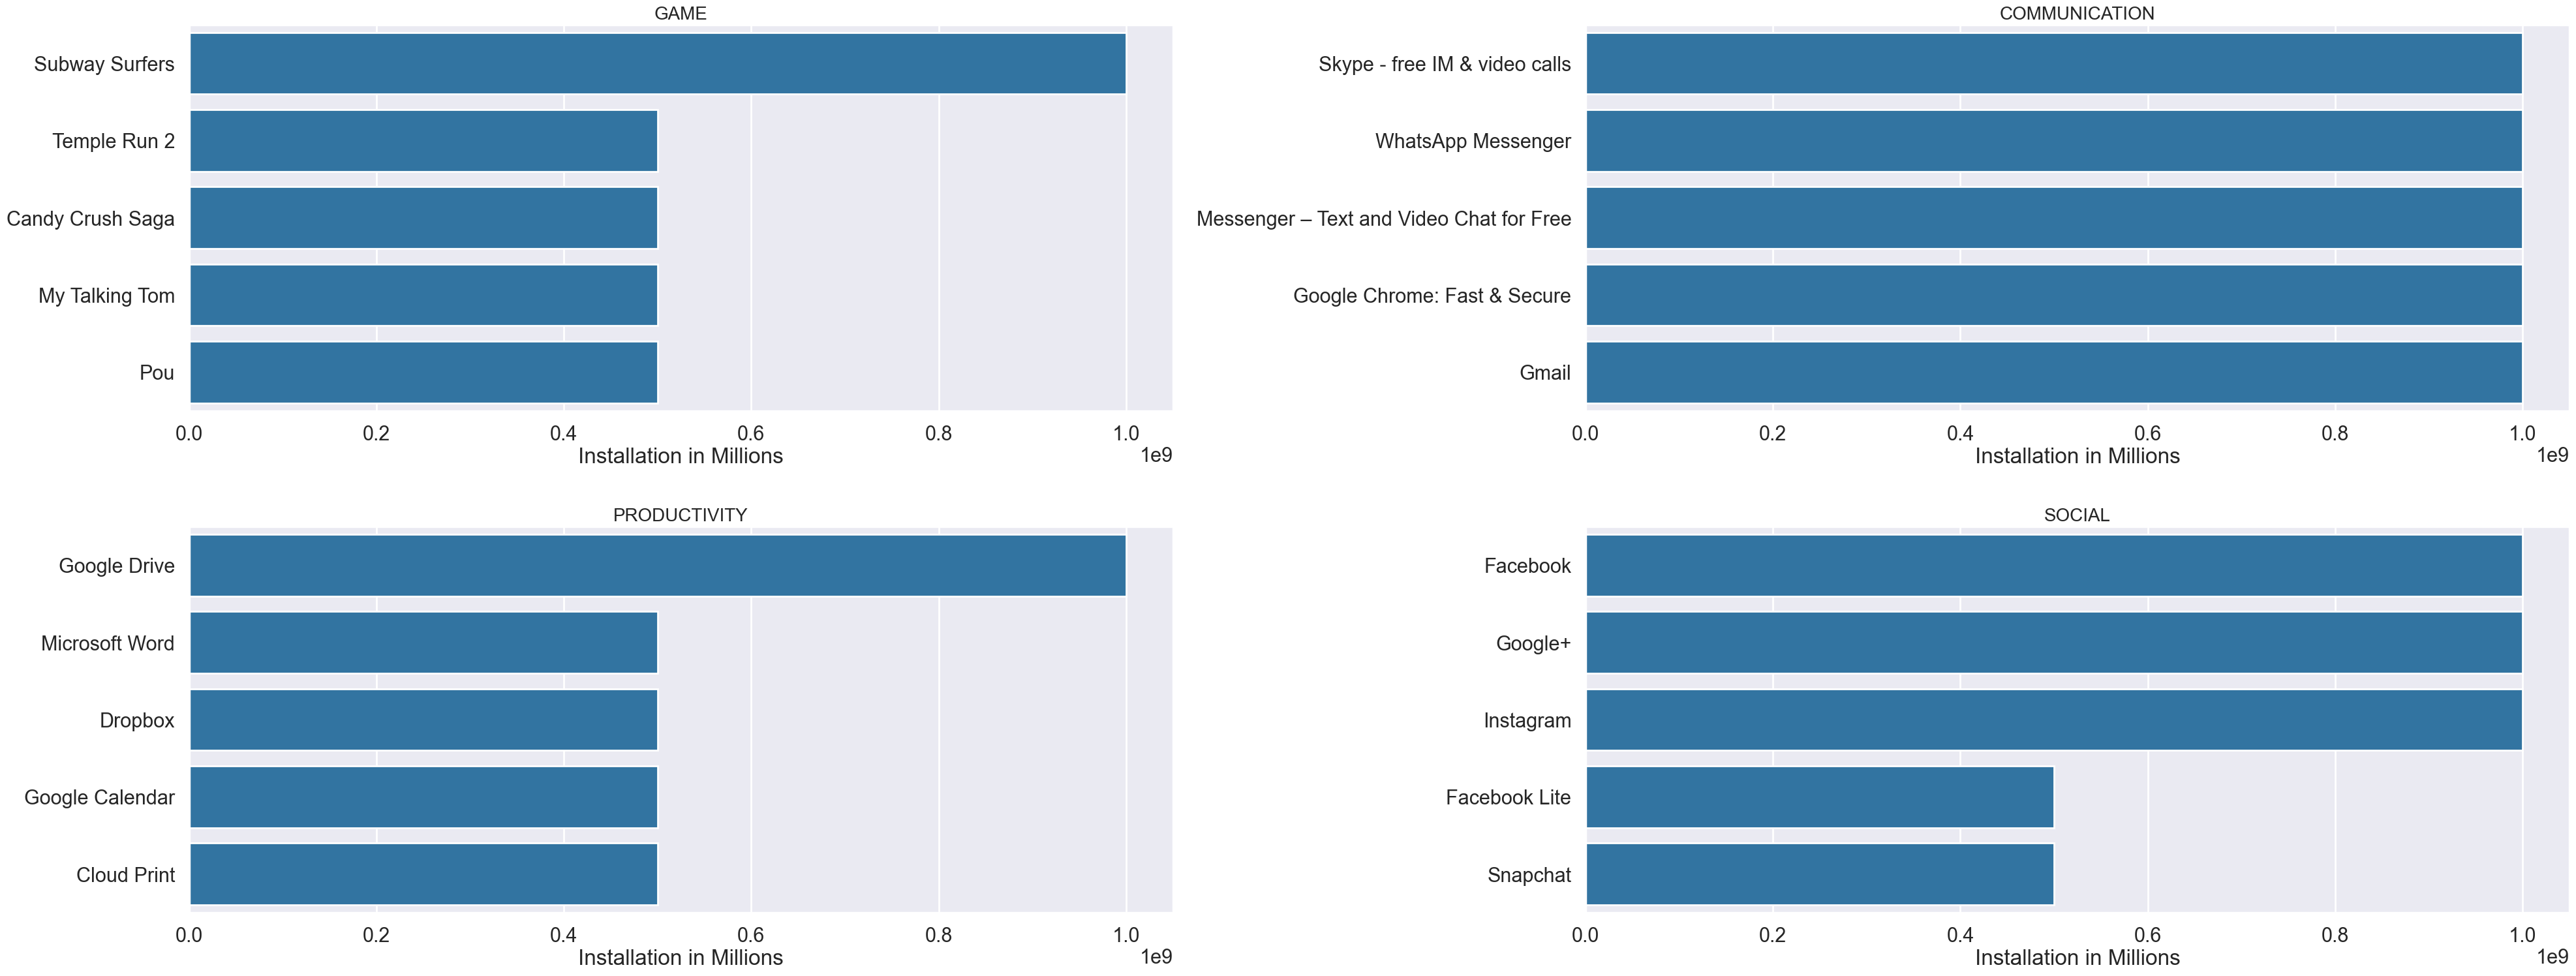

In [66]:
top_installs_each_cat=pd.DataFrame(df_copy.groupby(['Category','App'])['Installs'].sum().sort_values(ascending=False)).reset_index()
top_installs_each_cat
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = top_installs_each_cat[top_installs_each_cat.Category== app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()


How many apps with 5 star ratings?

In [71]:
top_rated_count=df_copy.groupby('Rating')['App'].count().sort_index(ascending=False)